### 1. Предварительный обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/Credit_Default.csv", delimiter=",")
df.head(10)

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1
5,24904.06414,57.471607,15.498598,0.000622,0
6,48430.35961,26.809132,5722.581981,0.118161,0
7,24500.14198,32.897548,2971.003310,0.121265,1
8,40654.89254,55.496853,4755.825280,0.116980,0
9,25075.87277,39.776378,1409.230371,0.056199,0


### 2. Анализ пропущенных значений

In [3]:
# Посчитаем сумму пропущенных значений в каждой колонке
missing_values = df.isnull().sum()
missing_values

Income            0
Age               0
Loan              0
Loan to Income    0
Default           0
dtype: int64

In [4]:
# Посчитаем процент пропущенных значений в каждой колонке
missing_percentage = (missing_values / len(df)) * 100
missing_percentage

Income            0.0
Age               0.0
Loan              0.0
Loan to Income    0.0
Default           0.0
dtype: float64

In [5]:
# Создание таблицы с пропущенными значениями
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
}).reset_index(drop=True)
missing_summary

,Column,Missing Values,Missing Percentage
0,Income,0,0.0
1,Age,0,0.0
2,Loan,0,0.0
3,Loan to Income,0,0.0
4,Default,0,0.0


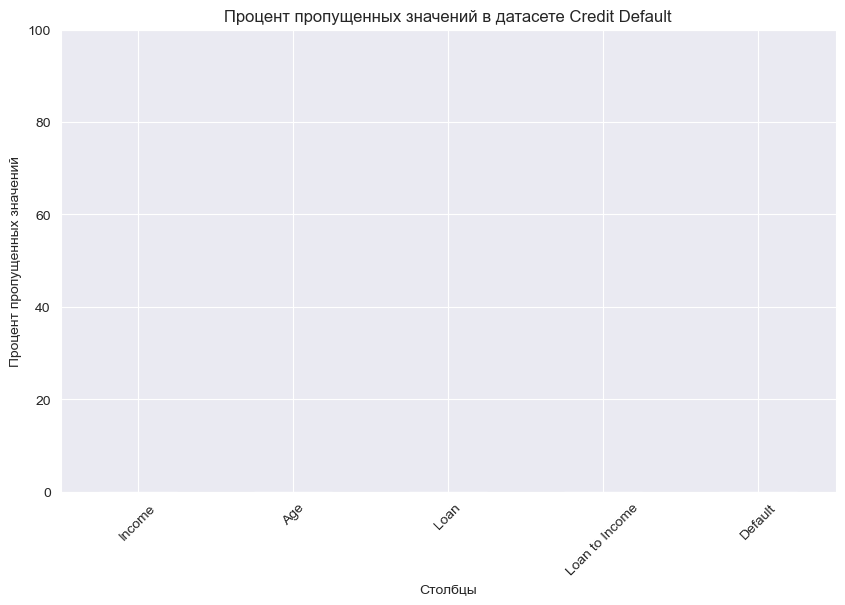

In [6]:
# Визуализируем
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='lightcoral')
plt.title('Процент пропущенных значений в датасете Credit Default')
plt.xlabel('Столбцы')
plt.ylabel('Процент пропущенных значений')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

Анализ и визуализация показали, что в датасете нет пропущенных значений. Это является положительным моментом для дальнейшего анализа.

### 3. Построение диаграмм попарного распределения признаков

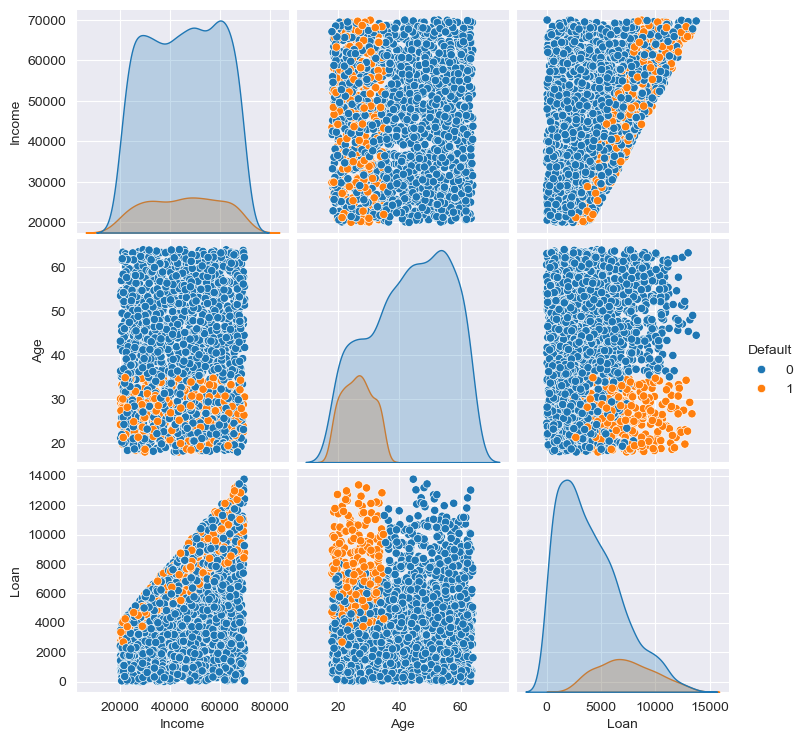

In [7]:
# График попарного распределения признаков Income, Age, Loan и таргета Default.
features = ['Income', 'Age', 'Loan', 'Default']
df_filtered = df[features]
sns.pairplot(df_filtered, hue='Default')
plt.show()

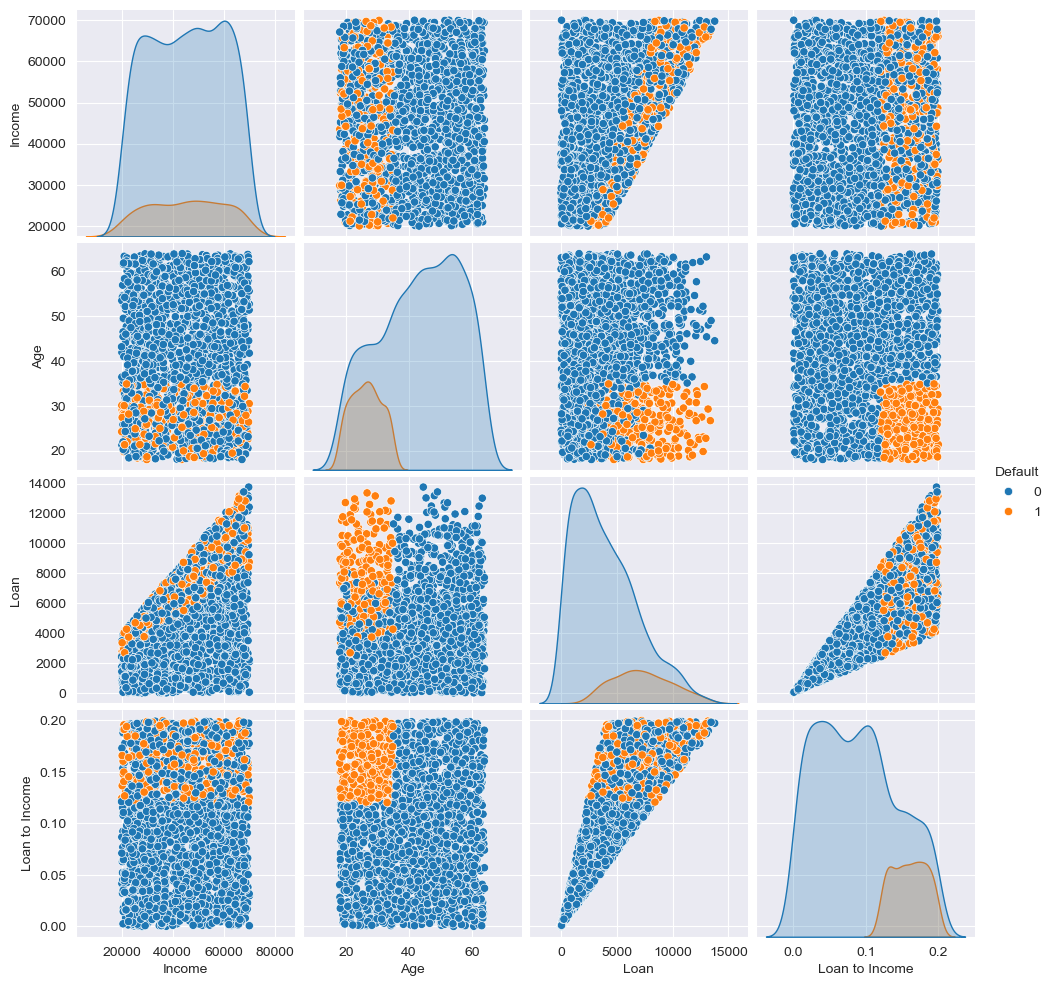

In [8]:
# График попарного распределения всех признаков и таргета
sns.pairplot(df, hue='Default')
plt.show()

Парные графики показывают, что каждый отдельный признак не совсем подходит для построения предсказаний, так как классы перекрывают друг друга. Но на графиках с комбинацией разных признаков можно определить почти четкие разделения между классами, что, безусловно, может положительно сказаться на обучении модели.

### 4. Корреляционный анализ

In [9]:
correlation_matrix = df.corr()
correlation_matrix

,Income,Age,Loan,Loan to Income,Default
Income,1.000000,-0.034984,0.441117,-0.019862,0.002284
Age,-0.034984,1.000000,0.006561,0.021588,-0.444765
Loan,0.441117,0.006561,1.000000,0.847495,0.377160
Loan to Income,-0.019862,0.021588,0.847495,1.000000,0.433261
Default,0.002284,-0.444765,0.377160,0.433261,1.000000


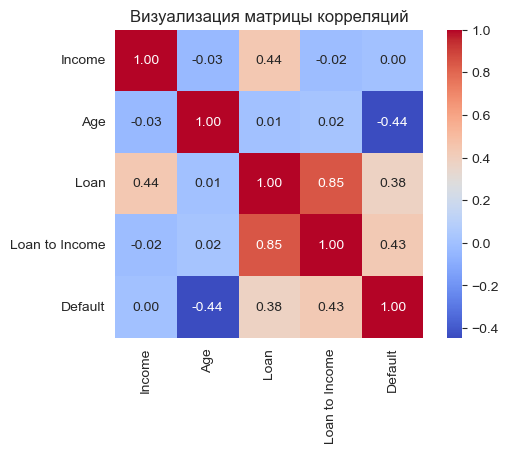

In [10]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Визуализация матрицы корреляций')
plt.show()

На визуализации матрицы корреляций можно увидеть сильную положительную корреляцию между "Income" и "Loan to Income" (0.85), что достаточно ожидаемо, поскольку более высокий доход обычно позволяет брать большие суммы займа. Корреляция "Default" с другими переменными невысока, что говорит о сложности выявления факторов, влияющих на дефолт.
Также, отрицательная корреляция между "Age" и "Default" (-0.44) может указывать на то, что с увеличением возраста дефолт менее вероятен, что стоит дополнительно исследовать.

### 5. Анализ баланса классов

In [11]:
class_distribution = df['Default'].value_counts()
class_distribution

Default
0    1717
1     283
Name: count, dtype: int64

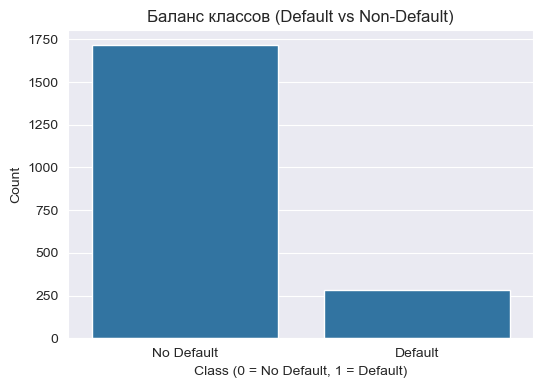

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Баланс классов (Default vs Non-Default)')
plt.xlabel('Class (0 = No Default, 1 = Default)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Default', 'Default'])
plt.show();

Визуализация показывает значительный дисбаланс между классами. Класс "Не дефолт" (0) значительно преобладает над классом "Дефолт" (1). Это может повлиять на модель, так как она может быть предвзята в сторону класса "Не дефолт". Это наблюдение говорит нам о том что стоит применить методы балансировки классов.

### 6. Заключение и выводы

 - Данные сильно несбалансированны, что требует применения методов обработки дисбаланса, таких как увеличение классов, уменьшение или использование алгоритмов, устойчивых к несбалансированным данным (например, методы на основе деревьев).
 - Существует высокая положительная корреляция между доходом и коэффициентом займа на доход, что может быть полезно для разработки функций, но важно учитывать, что корреляция не означает причинность.
 - Визуализация парных графиков четко демонстрирует разделение между классами, что может помочь в выборе методов классификации.
 - Отсутствие значительных пропусков в данных позволяет надежно проводить анализ и строить модели. Однако, несмотря на это, внимание к классу "Дефолт" требуется для разработки качественных прогностических моделей.

Следует продолжить исследование данных, учитывая указанные аспекты, и применять современные методы обработки и обучения моделей для достижения более точных результатов.